<a href="https://colab.research.google.com/github/SUBHASH-KANDHWAY/MACHINE-LEARNING-PROJECTS/blob/master/machineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cData = pd.read_csv("auto-mpg.csv")  
cData.shape

(398, 9)

In [3]:
cData.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
cData=cData.drop('car name',axis=1)

In [6]:
cData['origin']=cData['origin'].replace({1:'USA',
                                        2:'ASIA',
                                        3:'EUROPE'
})

In [7]:
cData.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,USA
1,15.0,8,350.0,165,3693,11.5,70,USA
2,18.0,8,318.0,150,3436,11.0,70,USA
3,16.0,8,304.0,150,3433,12.0,70,USA
4,17.0,8,302.0,140,3449,10.5,70,USA
5,15.0,8,429.0,198,4341,10.0,70,USA
6,14.0,8,454.0,220,4354,9.0,70,USA
7,14.0,8,440.0,215,4312,8.5,70,USA
8,14.0,8,455.0,225,4425,10.0,70,USA
9,15.0,8,390.0,190,3850,8.5,70,USA


In [8]:
cData = pd.get_dummies(cData, columns=['origin'])
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_ASIA,origin_EUROPE,origin_USA
0,18.0,8,307.0,130,3504,12.0,70,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,0,0,1


In [9]:
#A quick summary of the data columns
cData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_ASIA,origin_EUROPE,origin_USA
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.175879,0.198492,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.381197,0.399367,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [10]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
cData.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower        object
weight             int64
acceleration     float64
model year         int64
origin_ASIA        uint8
origin_EUROPE      uint8
origin_USA         uint8
dtype: object

In [11]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(cData.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
cData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_ASIA,origin_EUROPE,origin_USA
32,25.0,4,98.0,?,2046,19.0,71,0,0,1
126,21.0,6,200.0,?,2875,17.0,74,0,0,1
330,40.9,4,85.0,?,1835,17.3,80,1,0,0
336,23.6,4,140.0,?,2905,14.3,80,0,0,1
354,34.5,4,100.0,?,2320,15.8,81,1,0,0
374,23.0,4,151.0,?,3035,20.5,82,0,0,1


In [12]:
cData=cData.replace('?',np.nan)

In [13]:
cData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_ASIA,origin_EUROPE,origin_USA
32,25.0,4,98.0,NaN,2046,19.0,71,0,0,1
126,21.0,6,200.0,NaN,2875,17.0,74,0,0,1
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0
336,23.6,4,140.0,NaN,2905,14.3,80,0,0,1
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0
374,23.0,4,151.0,NaN,3035,20.5,82,0,0,1


In [14]:
cData.mean()

mpg                23.514573
cylinders           5.454774
displacement      193.425879
weight           2970.424623
acceleration       15.568090
model year         76.010050
origin_ASIA         0.175879
origin_EUROPE       0.198492
origin_USA          0.625628
dtype: float64

In [15]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller,axis=0)

cData['horsepower'] = cData['horsepower'].astype('float64')

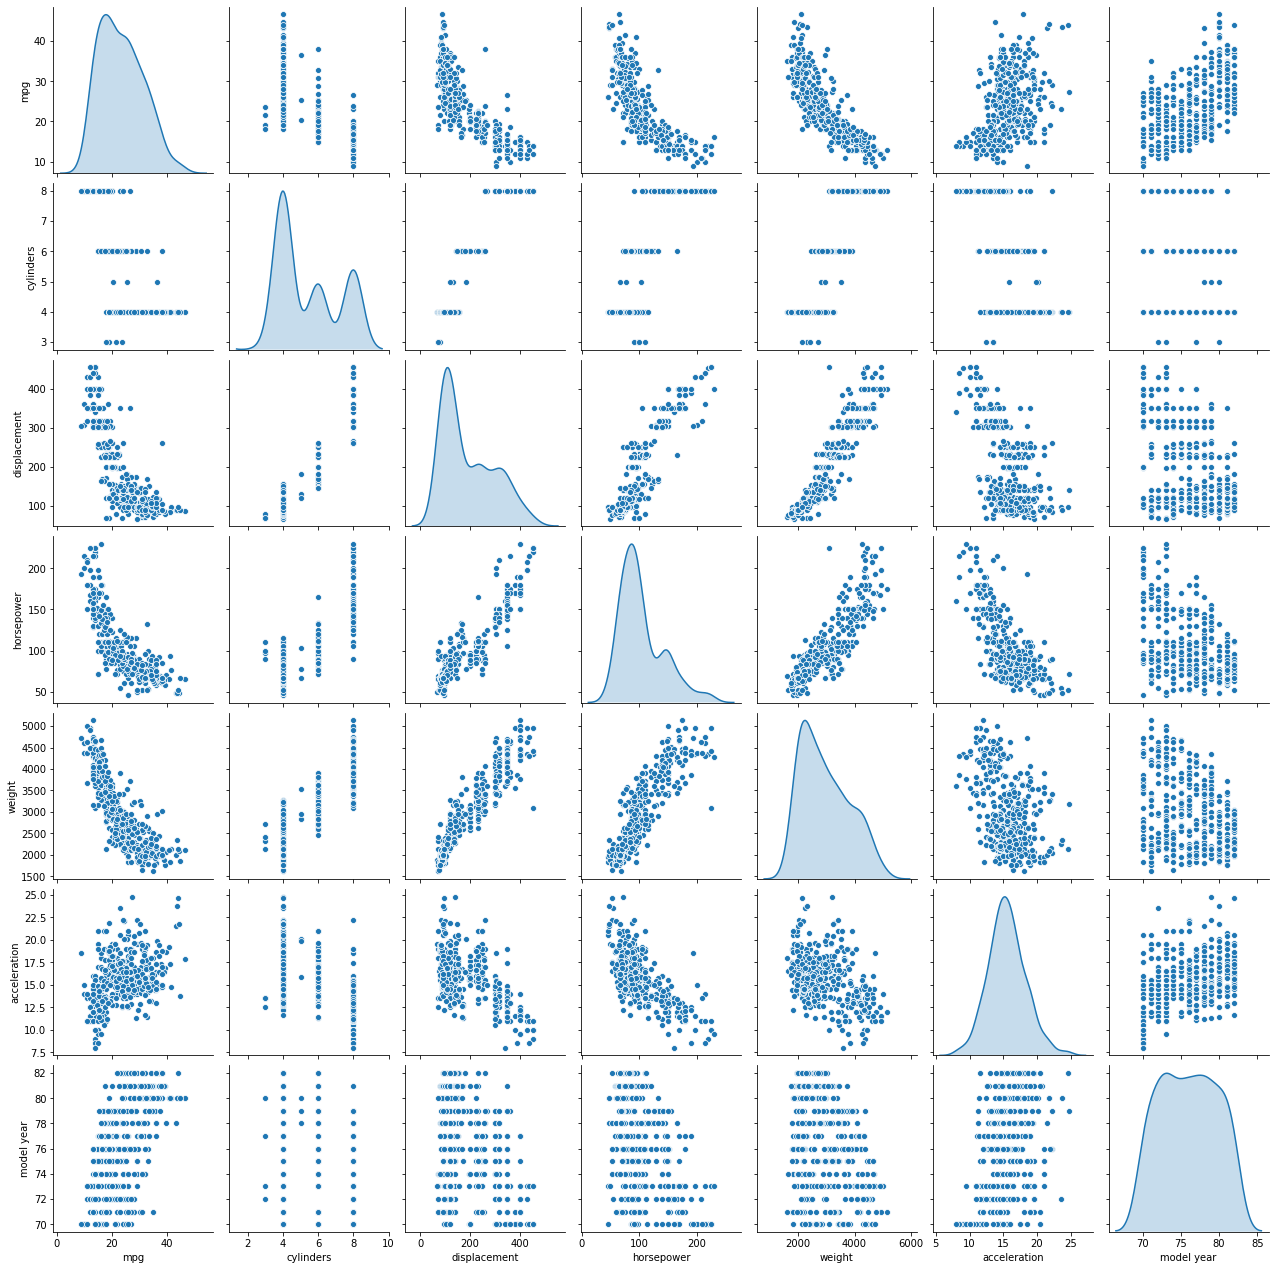

In [16]:
cData_attr = cData.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde') 

In [22]:
# lets build our linear model
# independant variables
x= cData.drop(['mpg','origin_EUROPE'], axis=1)
# the dependent variable
y = cData[['mpg']]

In [23]:
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.30, random_state=1)

In [24]:
regression_model = LinearRegression()
regression_model.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
for idx,colo_name in enumerate(trainx.columns):
  print('THE COFFIEIENT FOR {} IS {}'.format(colo_name,regression_model.coef_[0][idx]))

THE COFFIEIENT FOR cylinders IS -0.3948079661648387
THE COFFIEIENT FOR displacement IS 0.028945510765487563
THE COFFIEIENT FOR horsepower IS -0.02175220772354732
THE COFFIEIENT FOR weight IS -0.007352032065147354
THE COFFIEIENT FOR acceleration IS 0.06191936600761878
THE COFFIEIENT FOR model year IS 0.8369338917645005
THE COFFIEIENT FOR origin_ASIA IS 0.6060179643247396
THE COFFIEIENT FOR origin_USA IS -2.3952650365937744


In [28]:
intercept=regression_model.intercept_[0]
print('THE INTERCEPT IS IS {}'.format(intercept))

THE INTERCEPT IS IS -18.88946908069683


In [30]:
regression_model.score(testx,testy)

0.8433135132808829

In [31]:
regression_model.score(trainx,trainy)

0.8141025501610559

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(trainx)
X_test2 = poly.fit_transform(testx)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, trainy)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, trainy))

0.9018808799547509


In [34]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8657912628151392


In [36]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 8)
(278, 37)


***LOGISTIC REGRESSION***

In [37]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [41]:
PData = pd.read_csv("pima-indians-diabetes.csv")  
PData.shape

(768, 9)

In [42]:
PData.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [46]:
PData.isnull().values.any()

False

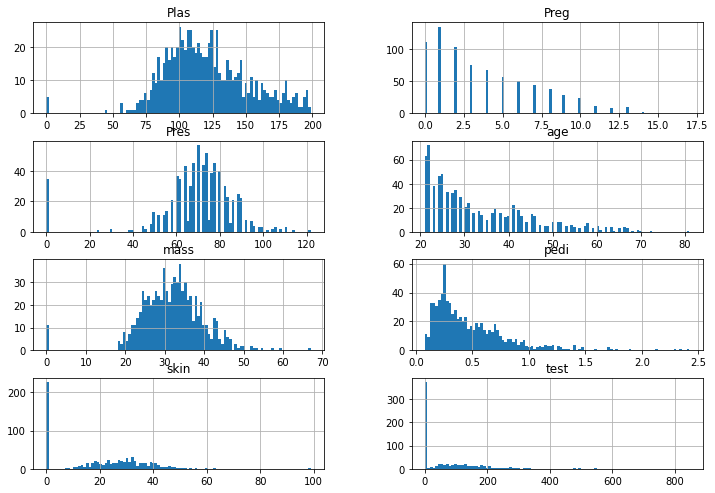

In [54]:
columns = list(PData)[0:-1] # Excluding Outcome column which has only 
PData[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

In [55]:
PData.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [69]:
def plot_corr(df,size=10):
  corr=df.corr()
  fig,ax=plt.subplots(figsize=(size,size))
  print(ax)
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  print(range(len(corr.columns)))
  print(corr.columns)
  plt.xticks(range(len(corr.columns)), corr.columns)
    

AxesSubplot(0.125,0.125;0.775x0.755)
range(0, 9)
Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')


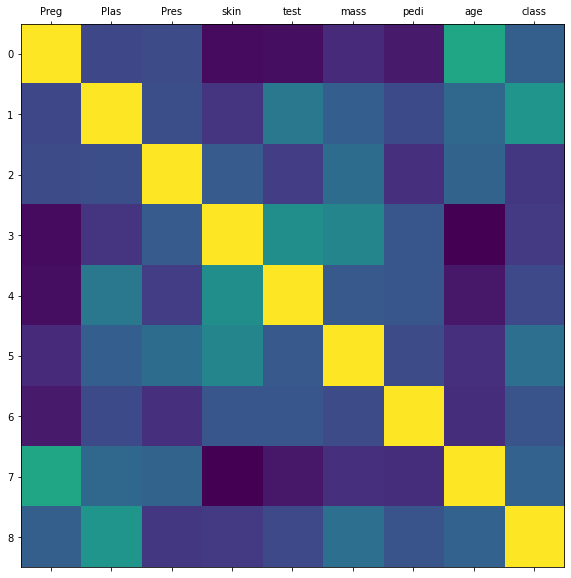

In [70]:
plot_corr(PData)

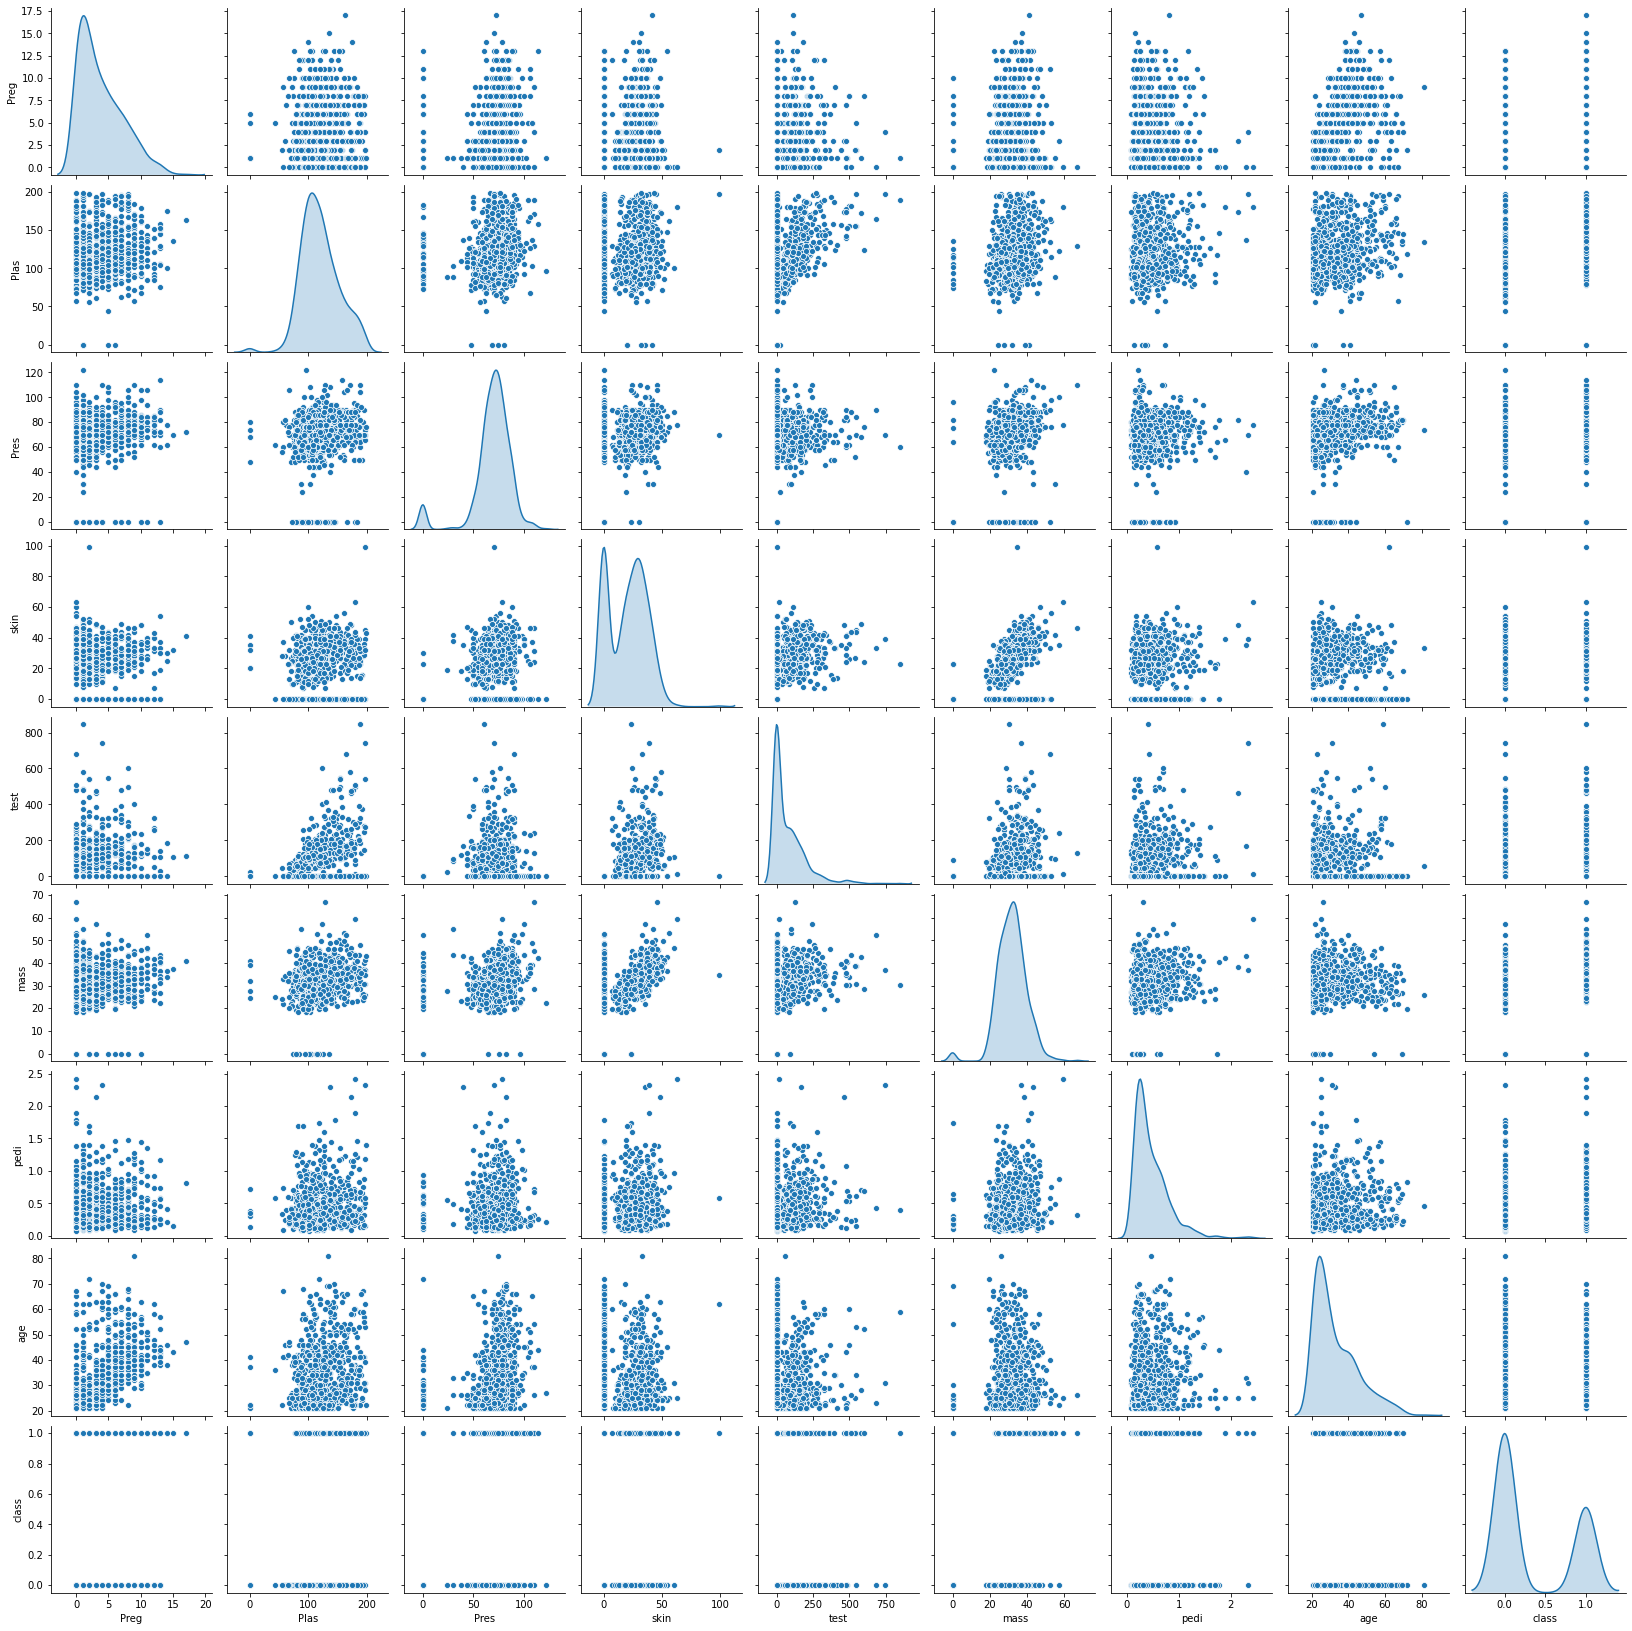

In [71]:
sns.pairplot(PData,diag_kind='kde')

In [73]:
n_true = len(PData.loc[PData['class'] == True])
n_false = len(PData.loc[PData['class'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


In [76]:
from sklearn.model_selection import train_test_split

X = PData.drop('class',axis=1)     # Predictor feature columns (8 X m)
Y = PData['class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [77]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [86]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(solver='liblinear')
model1.fit(x_train, y_train)
y_predict=model1.predict(x_test)
coef_df=pd.DataFrame(model1.coef_)
coef_df['intercept']=model1.intercept_
print(coef_df)

          0         1         2  ...         6         7  intercept
0  0.124471  0.026317 -0.029422  ...  0.346933  0.012689  -4.974766

[1 rows x 9 columns]


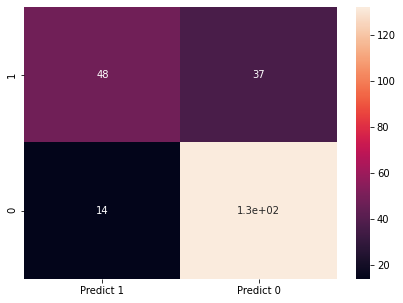

In [88]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

***K NEAREST NEIHBORS*** IMPLEMENTATION IN PYTHON .

In [100]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [101]:
import warnings 
warnings.filterwarnings("ignore")

In [102]:
dataset=pd.read_csv('data_cleaned.csv')

In [103]:
dataset.shape

(891, 25)

In [104]:
dataset.head(10)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,0,29.699118,8.4583,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,0,54.000000,51.8625,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7,0,2.000000,21.0750,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
8,1,27.000000,11.1333,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,1,14.000000,30.0708,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [105]:
x=dataset.drop(['Survived'],axis=1)

In [106]:
y=dataset['Survived']

In [107]:
x.shape,y.shape

((891, 24), (891,))

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [111]:
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head(10)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.367921,0.016510,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.673285,0.101229,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.019854,0.041136,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.334004,0.021731,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.170646,0.058694,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
clf=KNeighborsClassifier(n_neighbors=16)
clf.fit(x_train,y_train)
test_predict=clf.predict(x_test)
k=f1_score(test_predict,y_test)
print('TEST F1 SCORE   ',k)

TEST F1 SCORE    0.6938775510204083


In [134]:
def elbow(k):
  test_error=[]
  for i in k:
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    tap=clf.predict(x_test)
    tap=f1_score(tap,y_test)
    error=1-tap
    test_error.append(error)
  return test_error

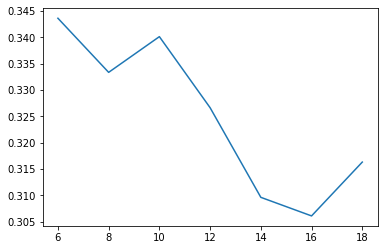

In [136]:
k=range(6,20,2)
test=elbow(k)
plt.plot(k,test)